In [21]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)



In [22]:
from datetime import datetime
import scipy.stats
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import HistGradientBoostingRegressor
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import missingno as msno
import math

In [23]:
df = pd.read_csv("data.csv",index_col='index')

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 371528 entries, 0 to 371527
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   dateCrawled          371528 non-null  object
 1   name                 371528 non-null  object
 2   seller               371528 non-null  object
 3   offerType            371528 non-null  object
 4   price                371528 non-null  int64 
 5   abtest               371528 non-null  object
 6   vehicleType          333659 non-null  object
 7   yearOfRegistration   371528 non-null  int64 
 8   gearbox              351319 non-null  object
 9   powerPS              371528 non-null  int64 
 10  model                351044 non-null  object
 11  kilometer            371528 non-null  int64 
 12  monthOfRegistration  371528 non-null  int64 
 13  fuelType             338142 non-null  object
 14  brand                371528 non-null  object
 15  notRepairedDamage    299468 non-null  o

'dateCrawled', 'dateCreated', and 'lastSeen' should be datetime type. It is preffered to convert them prior to use of 'describe' as it will provide more info for these columns.
Some of the columns have missing data, which needs to be analyzed.


In [25]:
df['dateCrawled']=pd.to_datetime(df['dateCrawled'])
df['dateCreated']=pd.to_datetime(df['dateCreated'])
df['lastSeen']=pd.to_datetime(df['lastSeen'])

<AxesSubplot: >

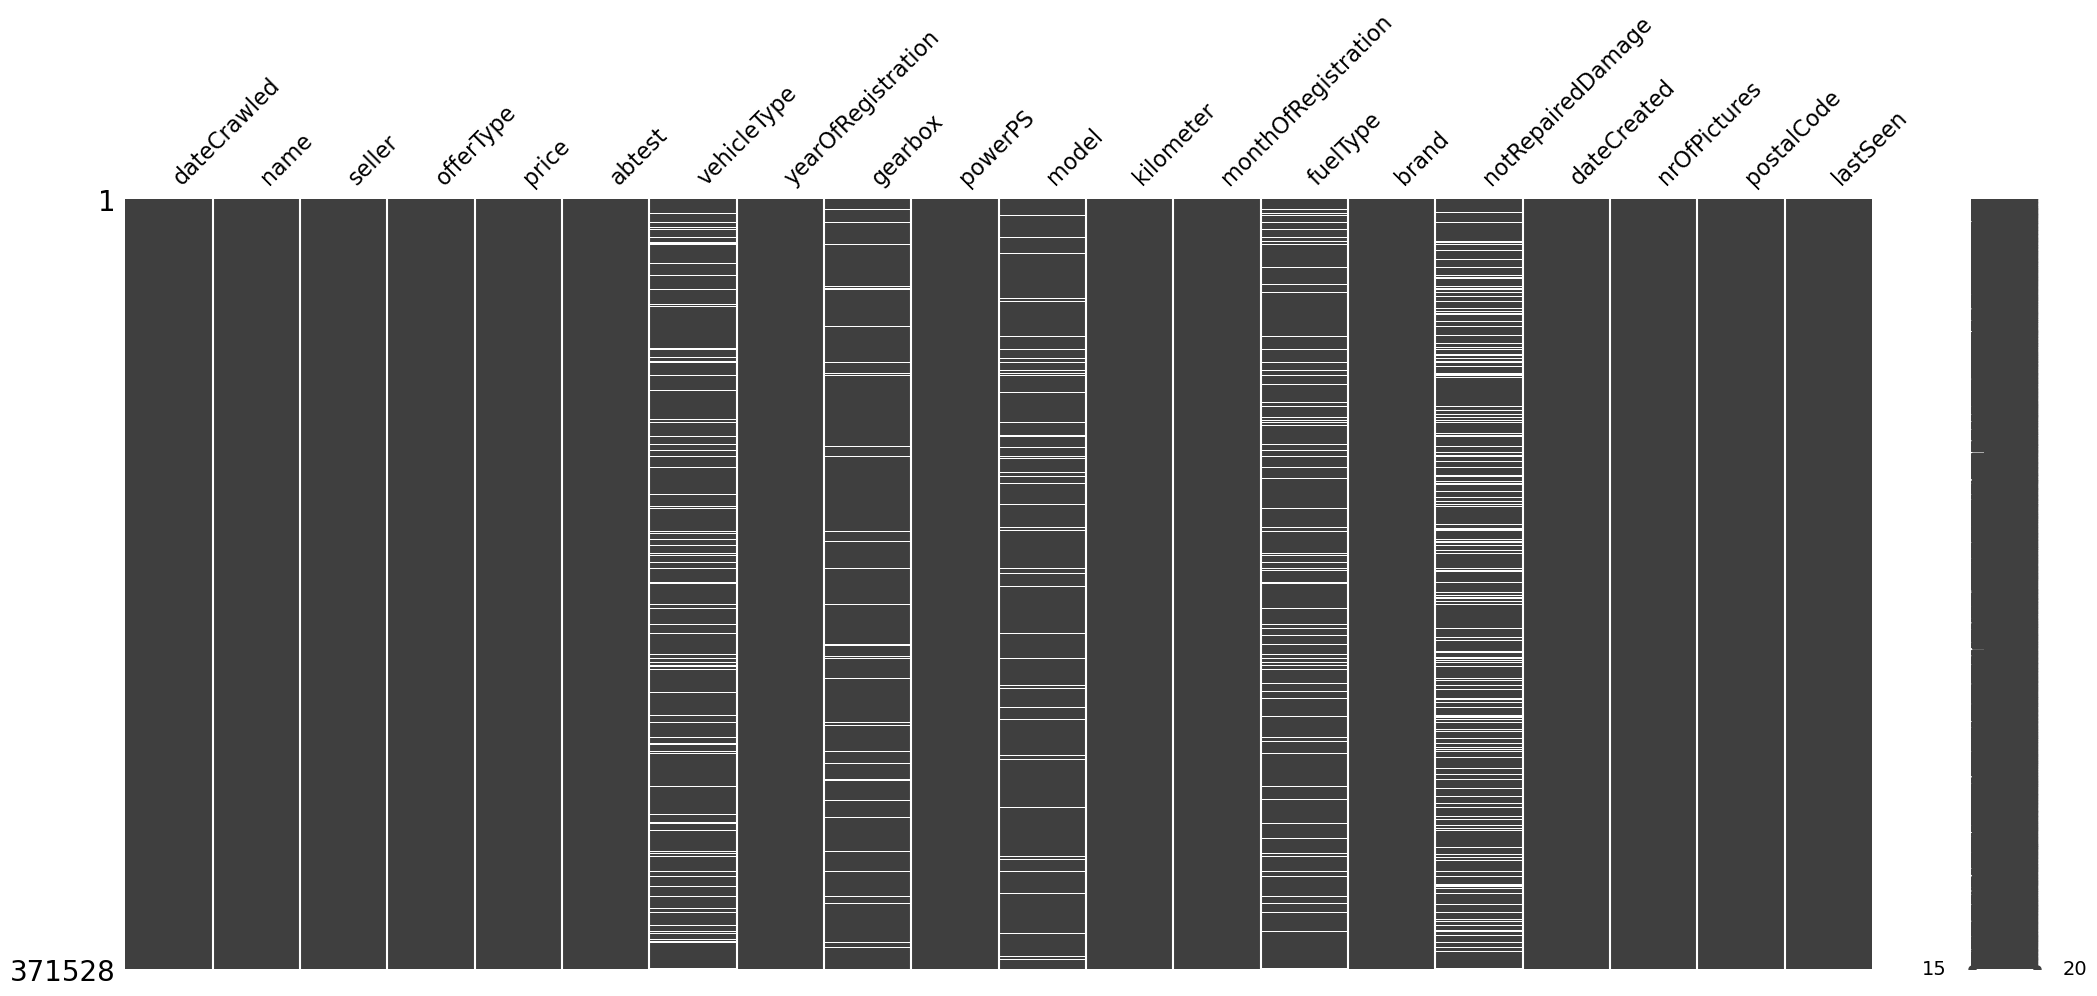

In [26]:
msno.matrix(df) 

The data is mostly intact and can be fetched. However, the variation of all fetures needs to analyzed prior to updating NULL.

In [27]:
df.describe(include='all')

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
count,371528,371528,371528,371528,3.715280e+05,371528,333659,371528.000000,351319,371528.000000,351044,371528.000000,371528.000000,338142,371528,299468,371528,371528.0,371528.00000,371528
unique,NaN,233531,2,2,NaN,2,8,NaN,2,NaN,251,NaN,NaN,7,40,2,NaN,NaN,NaN,NaN
top,NaN,Ford_Fiesta,privat,Angebot,NaN,test,limousine,NaN,manuell,NaN,golf,NaN,NaN,benzin,volkswagen,nein,NaN,NaN,NaN,NaN
freq,NaN,657,371525,371516,NaN,192585,95894,NaN,274214,NaN,30070,NaN,NaN,223857,79640,263182,NaN,NaN,NaN,NaN
mean,2016-03-21 13:30:31.202717184,NaN,NaN,NaN,1.729514e+04,NaN,NaN,2004.577997,NaN,115.549477,NaN,125618.688228,5.734445,NaN,NaN,NaN,2016-03-20 19:42:51.495015168,0.0,50820.66764,2016-03-30 03:37:50.548152832
min,2016-03-05 14:06:22,NaN,NaN,NaN,0.000000e+00,NaN,NaN,1000.000000,NaN,0.000000,NaN,5000.000000,0.000000,NaN,NaN,NaN,2014-03-10 00:00:00,0.0,1067.00000,2016-03-05 14:15:08
25%,2016-03-13 12:51:46.500000,NaN,NaN,NaN,1.150000e+03,NaN,NaN,1999.000000,NaN,70.000000,NaN,125000.000000,3.000000,NaN,NaN,NaN,2016-03-13 00:00:00,0.0,30459.00000,2016-03-23 11:32:10.500000
50%,2016-03-21 18:36:22,NaN,NaN,NaN,2.950000e+03,NaN,NaN,2003.000000,NaN,105.000000,NaN,150000.000000,6.000000,NaN,NaN,NaN,2016-03-21 00:00:00,0.0,49610.00000,2016-04-03 23:17:15
75%,2016-03-29 14:49:31.249999872,NaN,NaN,NaN,7.200000e+03,NaN,NaN,2008.000000,NaN,150.000000,NaN,150000.000000,9.000000,NaN,NaN,NaN,2016-03-29 00:00:00,0.0,71546.00000,2016-04-06 10:45:02
max,2016-04-07 14:36:58,NaN,NaN,NaN,2.147484e+09,NaN,NaN,9999.000000,NaN,20000.000000,NaN,150000.000000,12.000000,NaN,NaN,NaN,2016-04-07 00:00:00,0.0,99998.00000,2016-04-07 14:58:51


It should be noted that 'yearOfRegistration', 'price', and 'powerPS' may contain outliers based on the overview above. 

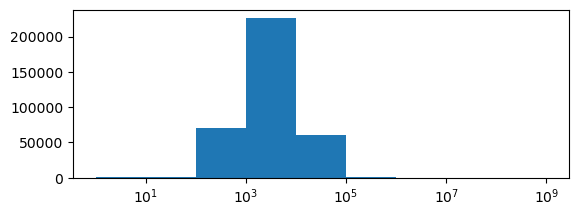

In [28]:
logbins = np.logspace(0,9,10)
plt.subplot(212)
plt.hist(df['price'], bins=logbins)
plt.xscale('log')
plt.show()

In [29]:
df[df['price']>10**5]['price'].count()

403

'price' for most vehicles is within 10^5. 403 samples scews data as std() of 'price' is 10^6 whereas, most of the data lies within 0 to 10^5.These samples will scew the model, as the model will attempt to fit these outliers as the cost associated with these data points will be high.Therefore, these outliers points needs to be discarded.

In [30]:
df=df[df['price']<10**5]
df.describe(include='all')

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
count,371119,371119,371119,371119,371119.000000,371119,333294,371119.00000,350980,371119.000000,350748,371119.000000,371119.000000,337801,371119,299125,371119,371119.0,371119.000000,371119
unique,NaN,233199,2,2,NaN,2,8,NaN,2,NaN,251,NaN,NaN,7,40,2,NaN,NaN,NaN,NaN
top,NaN,Ford_Fiesta,privat,Angebot,NaN,test,limousine,NaN,manuell,NaN,golf,NaN,NaN,benzin,volkswagen,nein,NaN,NaN,NaN,NaN
freq,NaN,657,371116,371107,NaN,192358,95862,NaN,274012,NaN,30058,NaN,NaN,223546,79611,262853,NaN,NaN,NaN,NaN
mean,2016-03-21 13:28:51.028269056,NaN,NaN,NaN,5606.278665,NaN,NaN,2004.54887,NaN,115.276887,NaN,125692.338576,5.735678,NaN,NaN,NaN,2016-03-20 19:41:03.928820992,0.0,50816.247047,2016-03-30 03:35:46.812879616
min,2016-03-05 14:06:22,NaN,NaN,NaN,0.000000,NaN,NaN,1000.00000,NaN,0.000000,NaN,5000.000000,0.000000,NaN,NaN,NaN,2014-03-10 00:00:00,0.0,1067.000000,2016-03-05 14:15:08
25%,2016-03-13 12:51:11.500000,NaN,NaN,NaN,1150.000000,NaN,NaN,1999.00000,NaN,70.000000,NaN,125000.000000,3.000000,NaN,NaN,NaN,2016-03-13 00:00:00,0.0,30459.000000,2016-03-23 11:18:58
50%,2016-03-21 18:30:14,NaN,NaN,NaN,2950.000000,NaN,NaN,2003.00000,NaN,105.000000,NaN,150000.000000,6.000000,NaN,NaN,NaN,2016-03-21 00:00:00,0.0,49610.000000,2016-04-03 23:16:38
75%,2016-03-29 14:49:09,NaN,NaN,NaN,7199.000000,NaN,NaN,2008.00000,NaN,150.000000,NaN,150000.000000,9.000000,NaN,NaN,NaN,2016-03-29 00:00:00,0.0,71543.000000,2016-04-06 10:45:02
max,2016-04-07 14:36:58,NaN,NaN,NaN,99999.000000,NaN,NaN,9999.00000,NaN,20000.000000,NaN,150000.000000,12.000000,NaN,NaN,NaN,2016-04-07 00:00:00,0.0,99998.000000,2016-04-07 14:58:51


The removal of 403 samples (approx. 1% data) reduced price.std() multifold while retaining the characterstics of other features.

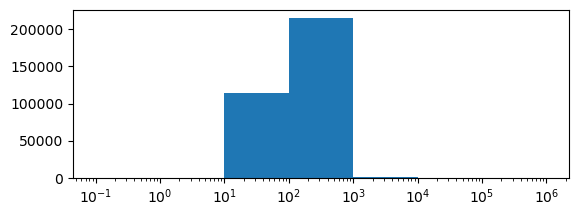

In [31]:
logbins=np.logspace(-1,6,8)
plt.subplot(212)
plt.hist(df['powerPS'], logbins)
plt.xscale('log')
plt.show()

In [32]:
print(df[df["powerPS"]<10]["powerPS"].count())
print(df[df["powerPS"]>10**3]["powerPS"].count())

40977
304


powerPS of vehicle can not be zero or less than 10.
powerPS of vehicle of same model/type are typically in the same range.

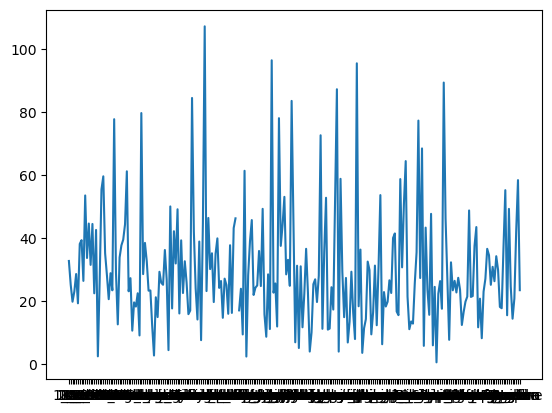

In [33]:
plt.plot(df[(df['powerPS']>10)&(df['powerPS']<10**3)].groupby(['model'])['powerPS'].std())

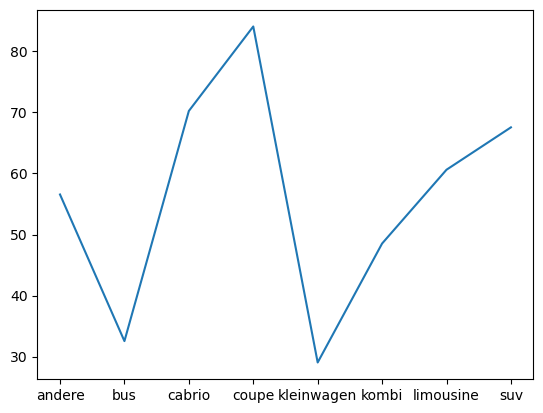

In [34]:
plt.plot(df[(df['powerPS']>10)&(df['powerPS']<10**3)].groupby(['vehicleType'])['powerPS'].std())

powerPS.std() is lower for model based agg than vehicletype agg, as vehicletype is more broader category. Therefore, first let's use powerPS.mean() based on model, and for vehicles for which model is missing let's use vehicletype, and for remaining mean of all vehicles.

In [35]:
modelPowerPSdf = pd.DataFrame(df[(df['model'].notna())&(df['powerPS']>10)&(df['powerPS']<10**3)].groupby(['model'])['powerPS'].mean())
modelPowerPSdf=modelPowerPSdf.reset_index()
df=df.merge(modelPowerPSdf, on ='model', suffixes=('', '_tomap'), how='left')
df['powerPS'] = np.where((df['powerPS_tomap'].notna())&(df['model'].notna())&((df['powerPS']>10**3)|(df['powerPS']<10)), df['powerPS_tomap'], df['powerPS'])
df.drop(['powerPS_tomap'],axis=1, inplace=True)
del modelPowerPSdf
df[(df['powerPS']<10)|(df['powerPS']>10**3)]['powerPS'].count()

6587

In [36]:
vTypePowerPSdf = pd.DataFrame(df[(df['vehicleType'].notna())&(df['powerPS']>10)&(df['powerPS']<10**3)].groupby(['vehicleType'])['powerPS'].mean())
vTypePowerPSdf=vTypePowerPSdf.reset_index()
df=df.merge(vTypePowerPSdf, on ='vehicleType', suffixes=('', '_tomap'), how='left')
df['powerPS'] = np.where((df['powerPS_tomap'].notna())&(df['vehicleType'].notna())&((df['powerPS']>10**3)|(df['powerPS']<10)), df['powerPS_tomap'], df['powerPS'])
df.drop(['powerPS_tomap'],axis=1, inplace=True)
del vTypePowerPSdf
df[(df['powerPS']<10)|(df['powerPS']>10**3)]['powerPS'].count()

3738

In [37]:
df.loc[(df['powerPS']<10)|(df['powerPS']>10**3),'powerPS']=df[(df['powerPS']>10)&(df['powerPS']<10**3)]['powerPS'].mean()

Now, let's look at yearOfRegistration' which varies from 1000 to 9999, both of which is infeasible. Automobiles did not exist in 1000 and with data crawled in 2016, first time registration can not be beyond that time.

Therefore, there have been mistake in the entry of yearOfRegistration of vehicles, which needs to be corrected/ dropped.

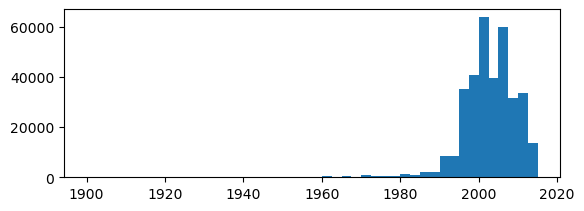

In [38]:
bins=np.linspace(1900, 2015, 47)
plt.subplot(211)
plt.hist(df[(df['yearOfRegistration']>=1900)&(df['yearOfRegistration']<=2015)]['yearOfRegistration'], bins)
plt.show()

'yearOfRegistration' prior to 1960 and post 2015 needs to be fixed.
There are 25k+ vehicles with infeasible 'yearOfRegistration'. Dropping all these data points will result in loss of 7% of data. Vehicles of same model tend to be launched in same time range, which can be used to approximate yearOfRegistration. Moreoever, kilometer can be used to augment the approximation.

In [39]:
modelKilometerYearDF=pd.DataFrame(df[(df['model'].notna())&(df['yearOfRegistration']<=2015)&(df['yearOfRegistration']>=1960)].groupby(['model', 'kilometer'])['yearOfRegistration'].mean())
modelKilometerYearDF=modelKilometerYearDF.reset_index()
df=df.merge(modelKilometerYearDF, on=['model', 'kilometer'], suffixes=('', '_tomap'), how='left')
df['yearOfRegistration']=np.where((df['yearOfRegistration_tomap'].notna())&(df['model'].notna())&((df['yearOfRegistration']>2015)|(df['yearOfRegistration']<1960)), df['yearOfRegistration_tomap'], df['yearOfRegistration'])
del modelKilometerYearDF
df.drop(['yearOfRegistration_tomap'], axis=1, inplace=True)
df[(df['yearOfRegistration']<1960)|(df['yearOfRegistration']>2015)]['yearOfRegistration'].count()

3628

3792 vehicles with out of bound yearOfRegistration does not have a model. This will need to be fixed or dropped from data. For these data points combination of brand and powerPS can be used, as companies tend to use a single type of engine on a model. However, often companies use one engine on multiple models. Now given that the rationale to know the model is to know the timeframe car was launched, even upon using brand and powerPS if a wrong model is selected it has to be from the same time-period, as companies discontinues use of an engine as new tech evolves. So, let's first get model using brand and powerPS.

In [40]:
mappingDF=pd.DataFrame(df[(df['brand'].notna())&(df['yearOfRegistration']<=2015)&(df['yearOfRegistration']>=1960)].groupby(['brand', 'powerPS', 'kilometer'])['yearOfRegistration'].mean())
mappingDF=mappingDF.reset_index()
df=df.merge(mappingDF, on=['brand', 'powerPS', 'kilometer'], suffixes=('', '_tomap'), how='left')
df['yearOfRegistration']=np.where((df['yearOfRegistration_tomap'].notna())&(df['brand'].notna())&((df['yearOfRegistration']>2015)|(df['yearOfRegistration']<1960)), df['yearOfRegistration_tomap'], df['yearOfRegistration'])
del mappingDF
df.drop(['yearOfRegistration_tomap'], axis=1, inplace=True)
df[(df['yearOfRegistration']<1960)|(df['yearOfRegistration']>2015)]['yearOfRegistration'].count()

226

In [41]:
df.loc[(df['yearOfRegistration']>2015)|(df['yearOfRegistration']<1960), 'yearOfRegistration']=df[(df['yearOfRegistration']<=2015)&(df['yearOfRegistration']>=1960)]['yearOfRegistration'].mean()

In [ ]:
#Get the time (days) to sale the car
df['DaysToSales'] = (df['lastSeen'] - df['dateCreated']).dt.days / np.timedelta64(1, 'D')


In [43]:
df['monthsUsed']=(pd.DatetimeIndex(df['dateCreated']).year-df['yearOfRegistration'])*12+pd.DatetimeIndex(df['dateCreated']).month-df['monthOfRegistration']

In [44]:
df['seller'] = pd.factorize(df['seller'])[0]

In [45]:
df['offerType']= pd.factorize(df['offerType'])[0]

In [46]:
df['abtest'] = pd.factorize(df['abtest'])[0]

Field 'Gearbox' is mising in some samples. Given similar models tend to have same gearbox and categorical data type, mode of 'gearbox' of same model is used


In [47]:
temp_gearbox_df=df[df['model'].notna()].groupby('model')['gearbox'].agg(lambda x: pd.Series.mode(x)[0]).to_frame()
temp_gearbox_df=temp_gearbox_df.reset_index()
df=df.merge(temp_gearbox_df, on='model', suffixes=('','_tomap'), how='left')
df['gearbox']= np.where((df['gearbox'].isna())&(df['model'].notna()), df['gearbox_tomap'], df['gearbox'])
del temp_gearbox_df
df.drop(['gearbox_tomap'], axis=1, inplace=True)
df['gearbox'].fillna(df['gearbox'].agg(lambda x: pd.Series.mode(x)[0]), inplace=True)
df['gearbox']=pd.factorize(df['gearbox'])[0]

/tmp/ipykernel_3286/2027035377.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['gearbox'].fillna(df['gearbox'].agg(lambda x: pd.Series.mode(x)[0]), inplace=True)


<AxesSubplot: xlabel='fuelType'>

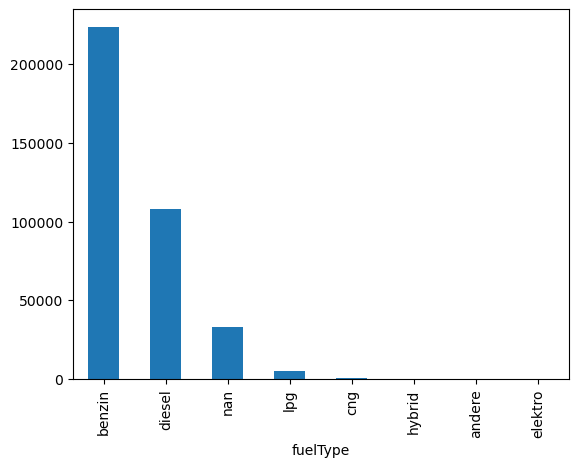

In [48]:
df['fuelType'].value_counts(dropna=False).plot(kind='bar')

Out of 7 types of fuel most vehicles uses either uses two types of fuel ('benzin' or 'diesel') or their fuel type is unknown. 

Specific models of vehicles tend to use same 'fuelType', which can be used, and for remaining mode of all data can be used.

In [49]:
temp_fuelType_df=df[df['model'].notna()].groupby('model')['fuelType'].agg(lambda x: pd.Series.mode(x)[0]).to_frame()
temp_fuelType_df=temp_fuelType_df.reset_index()
df=df.merge(temp_fuelType_df, on='model', suffixes=('','_tomap'), how='left')
df['fuelType']= np.where((df['fuelType'].isna())&(df['model'].notna()), df['fuelType_tomap'], df['fuelType'])
del temp_fuelType_df
df.drop(['fuelType_tomap'], axis=1, inplace=True)

vehicles with unknown fuelType are updated with other/andere, rather than using mode because (i) logical to segregate as other which can be any of the type rather than fixing to one fueltype, (ii) yields higher pearson correlation coefficient.

In [50]:
df['fuelType'].fillna('andere', inplace=True)

/tmp/ipykernel_3286/3630168122.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['fuelType'].fillna('andere', inplace=True)


In [51]:
enc=pd.get_dummies(df['fuelType'], prefix='fuelType')
df=df.join(enc)
del enc

37k+ data points have vehicleType as NULL. brand can be utilized to get vehicleType

In [52]:
temp_vehicleType_df=df[df['model'].notna()].groupby('model')['vehicleType'].agg(lambda x: pd.Series.mode(x)[0]).to_frame()
temp_vehicleType_df=temp_vehicleType_df.reset_index()
df=df.merge(temp_vehicleType_df, on='model', suffixes=('','_tomap'), how='left')
df['vehicleType']= np.where((df['vehicleType'].isna())&(df['model'].notna()), df['vehicleType_tomap'], df['vehicleType'])
del temp_vehicleType_df
df.drop(['vehicleType_tomap'], axis=1, inplace=True)
df['vehicleType'].fillna(df['vehicleType'].agg(lambda x: pd.Series.mode(x)[0]), inplace=True)

/tmp/ipykernel_3286/338929234.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['vehicleType'].fillna(df['vehicleType'].agg(lambda x: pd.Series.mode(x)[0]), inplace=True)


In [53]:
enc=pd.get_dummies(df['vehicleType'], prefix='vehicleType')
df=df.join(enc)
del enc

70k+ data points have missing information for 'notRepairedDamage',which is 20% of data so use of mode may scew the data. Therefore, rather than using mode let's use factorize and then substitute -1(Nan) with either 0.5 or 0 (notRepairedDamage will not be avaiable if vehicle was not damaged, which is similar to !notRepairedDamage) and then compare df.corr for selection

In [54]:
df['notRepairedDamage']=pd.factorize(df['notRepairedDamage'])[0]
df['notRepairedDamage'].replace(-1,0, inplace=True)

/tmp/ipykernel_3286/798394146.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['notRepairedDamage'].replace(-1,0, inplace=True)


Postal Code can be utilized on cojugation with Census data to fetch population and income level in the region. However, given limited information about dataset, it is difficult to obtain much information.

Drop columns which are not to be used.

In [58]:
df.drop(['yearOfRegistration', 'monthOfRegistration', 'postalCode', 'nrOfPictures', 'dateCrawled', 'lastSeen', 'dateCreated', 'name', 'vehicleType',
        'model', 'fuelType', 'brand'], axis=1, inplace=True)

In [59]:
#df.describe(include='all')

Normalization of data:

In [60]:
df['powerPS']=(df['powerPS']-df['powerPS'].mean())/df['powerPS'].std()
df['kilometer']=(df['kilometer']-df['kilometer'].mean())/df['kilometer'].std()
df['monthsUsed']=(df['monthsUsed']-df['monthsUsed'].mean())/df['monthsUsed'].std()

Train Test Split

In [61]:
x, y = df.drop('price',axis=1), df['price']

In [62]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2)

In [63]:
est = HistGradientBoostingRegressor(max_iter=2000).fit(X_train, Y_train)
print(est.score(X_train, Y_train))
print(est.score(X_test, Y_test))

0.8392010306596878
0.8135957135268481


In [64]:
import joblib
joblib.dump(est, "model.joblib")

['model.joblib']